In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set()

In [7]:
data1 = pd.read_csv("a1_data/a1_d2.csv", header = None)

In [8]:
data1.head()

,0,1,2,3
0,-6.672418,-1.206198,-1.081050,0
1,1.675598,0.614994,-0.971600,0
2,-4.039058,0.335102,0.544618,1
3,0.793526,-0.235277,0.551771,1
4,3.820273,-0.274691,0.454743,1


In [9]:
X1 = data1[0]
X2 = data1[1]
Y = data1[2]

In [10]:
X1.shape

(1000,)

In [131]:
max(X1)

3.745271841

In [132]:
max(X2)

2.554851469

In [5]:
type(Y)

pandas.core.series.Series

In [6]:
X1 = np.asarray(X1)
X2 = np.asarray(X2)
Y = np.asarray(Y)

In [7]:
X1_mean = np.sum(X1)/X1.shape[0]
X2_mean = np.sum(X2)/X2.shape[0]


In [8]:
X1_mean
X1.shape

(1000,)

In [9]:
X2_mean

-0.009234630569000004

In [10]:
X = data1.iloc[:,:-1]

In [127]:
Y = data1.iloc[:,-1]

In [11]:
X

,0,1
0,-0.598283,1.023534
1,1.115929,0.512127
2,1.169815,-1.072747
3,0.631926,-0.255663
4,0.052532,1.198445
...,...,...
995,-1.226337,-0.507286
996,0.107578,0.634166
997,-0.317336,-0.357282
998,-0.295127,0.746446


In [12]:
X = np.asarray(X)
X = X.T # columns are individual training examples, rows are the features

In [13]:
Y = Y.T # Y is now a column vector containing class labels

In [14]:
Y.shape

(1000,)

In [15]:
feature_mean = np.sum(X, axis=1)/X.shape[1]

In [16]:
feature_mean

array([ 0.00228607, -0.00923463])

In [58]:
positive_class.shape


(2, 500)

In [20]:
positive_class = X[:,np.where(Y==1)[0]]
negative_class = X[:,np.where(Y==0)[0]]
positive_class_mean = np.sum (positive_class, axis=1)/positive_class.shape[1]
negative_class_mean = np.sum (negative_class, axis=1)/negative_class.shape[1]
positive_class_mean = positive_class_mean.reshape((positive_class_mean.shape[0],1))
negative_class_mean = negative_class_mean.reshape((negative_class_mean.shape[0],1))

In [21]:
# type(np.where(Y==1)[0])
# X[:,0]
positive_class_mean.shape
# X[:,np.where(Y==1)[0]].shape
# np.where(Y==1)[0]

(2, 1)

In [22]:
(positive_class_mean+ negative_class_mean)/2

array([[ 0.00228607],
       [-0.00923463]])

In [23]:
n_positive_class = positive_class.shape[1]
n_negative_class = negative_class.shape[1]
n_features = X.shape[1]

In [24]:
print(n_features, n_negative_class, n_positive_class)

1000 500 500


In [11]:
# Wrong : should be positive_class - positive_class_mean
Sw = positive_class.dot(positive_class.T)/n_positive_class + negative_class.dot(negative_class.T)/n_negative_class

NameError: name 'positive_class' is not defined

In [60]:
Sw.shape

(2, 2)

In [61]:
Sw

array([[1.87408312, 0.00771462],
       [0.00771462, 2.30010199]])

In [62]:
diff = positive_class_mean - negative_class_mean
Sb = diff.dot(diff.T)

In [63]:
Sb

array([[3.61711246e-03, 1.19331639e-01],
       [1.19331639e-01, 3.93685299e+00]])

In [64]:
# Now, we need to find eigenvectors for inverse(Sw)*Sb

A = np.linalg.inv(Sw).dot(Sb)

In [65]:
A

array([[0.00171653, 0.0566297 ],
       [0.05187526, 1.71140938]])

In [66]:
eigenvalues, eigenvectors = np.linalg.eig(A)

In [67]:
print(eigenvalues,eigenvectors)

[0.         1.71312591] [[-0.99954092 -0.03307141]
 [ 0.03029751 -0.99945299]]


In [68]:
pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]

In [69]:
pairs

[(0.0, array([-0.99954092,  0.03029751])),
 (1.7131259063753541, array([-0.03307141, -0.99945299]))]

In [70]:
pairs = sorted (pairs, key = lambda x:x[0], reverse = True)

In [71]:
pairs

[(1.7131259063753541, array([-0.03307141, -0.99945299])),
 (0.0, array([-0.99954092,  0.03029751]))]

In [72]:
w = pairs[0][1]

In [73]:
w

array([-0.03307141, -0.99945299])

In [74]:
w = w.T # Make w a column matrix
w = w.reshape ((w.shape[0]),1)

In [75]:
w.shape

(2, 1)

In [76]:
w[0]

array([-0.03307141])

In [53]:
projected_X = w.T.dot(X)
projected_positive_class = w.T.dot(positive_class)
projected_negative_class = w.T.dot(negative_class)
projected_overall_mean = np.mean(projected_X)
projected_mean_positive = np.mean(projected_positive_class)
projected_mean_negative = np.mean(projected_negative_class)
projected_overall_stddev = np.std(projected_X)
projected_stddev_positive = np.std(projected_positive_class)
projected_stddev_negative = np.std(projected_negative_class)

In [133]:
projected_mean_positive

-0.9833730710725865

In [79]:
def solve (mu1, mu2, sigma1, sigma2):
    
    a = sigma1**2 - sigma2**2
    b = -2*(mu2 * sigma1**2 - mu1 * sigma2**2)
    c = (sigma1**2 * mu2**2 - sigma2**2 * mu1**2) - (2 * sigma1**2 * sigma2**2 * np.log(sigma1/sigma2))
    
    return np.roots([a,b,c])

In [129]:
intersection_point[0]

0.15206762269172108

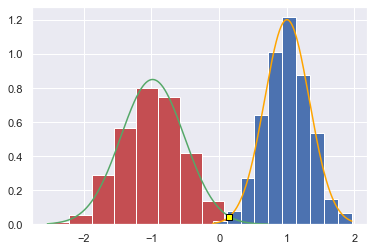

In [121]:
fig = plt.figure()
x1 = np.linspace(min(projected_positive_class[0]),max(projected_positive_class[0]),1000)
x2 = np.linspace(min(projected_negative_class[0]),max(projected_negative_class[0]),1000)

plt.hist(projected_positive_class[0],color='r',density=True)
plt.hist(projected_negative_class[0],color='b',density=True)
plt.plot(x1,stats.norm.pdf(x1,projected_mean_positive,projected_stddev_positive),color='g')
plt.plot(x2,stats.norm.pdf(x2,projected_mean_negative,projected_stddev_negative),color='orange')

intersection_point = solve (projected_mean_positive, projected_mean_negative, projected_stddev_positive, projected_stddev_negative)
intersection_point = [x for x in intersection_point if (x>min(projected_mean_negative,projected_mean_positive)) and (x<max(projected_mean_negative,projected_mean_positive)) ]
plt.plot(intersection_point, stats.norm.pdf(intersection_point, projected_mean_negative, projected_stddev_negative), 's', color='black', mfc='yellow')

In [50]:
print(x1.shape)
print(projected_mean_positive)
print(projected_stddev_positive)

(1000,)
-0.9833730710725865
0.46873123584106535


In [51]:
min(projected_positive_class[0])

-2.537684931783671

In [52]:
projected_X.shape

(1, 1000)

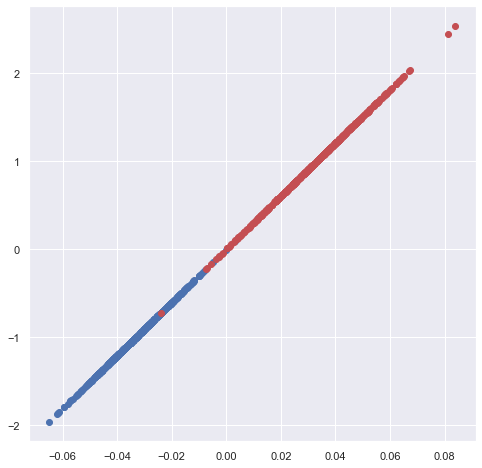

In [135]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes()
lambd = w[1]/w[0]
ax.scatter(projected_negative_class * w[0], projected_negative_class * w[1], color = 'b')
ax.scatter(projected_positive_class * w[0], projected_positive_class * w[1], color = 'r')
# plt.xlim(-0.01,0.01)
plt.show()

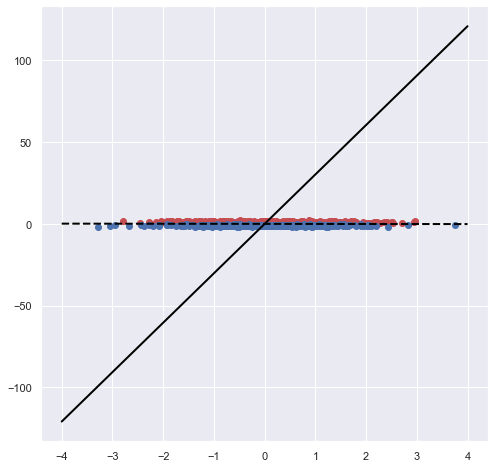

In [125]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes()

x1 = np.linspace (-4,4,1000)
x11 = np.linspace (-5,-4,1000)
x2 = (-w[0]/w[1])*x1 # Normal to the line on which points are projected
x3 = (w[1]/w[0])*(x1) # Actual line (hyperplane crossing the original feature plane) along which points are projected

ax.scatter(positive_class[0],positive_class[1],color='r')
ax.scatter(negative_class[0],negative_class[1],color='b')
ax.plot(x1,x2,color='black',linestyle = 'dashed', linewidth=2.0)
ax.plot((x1),x3,color='black',linewidth=2.0)
# plt.ylim(-4,4)
plt.show()

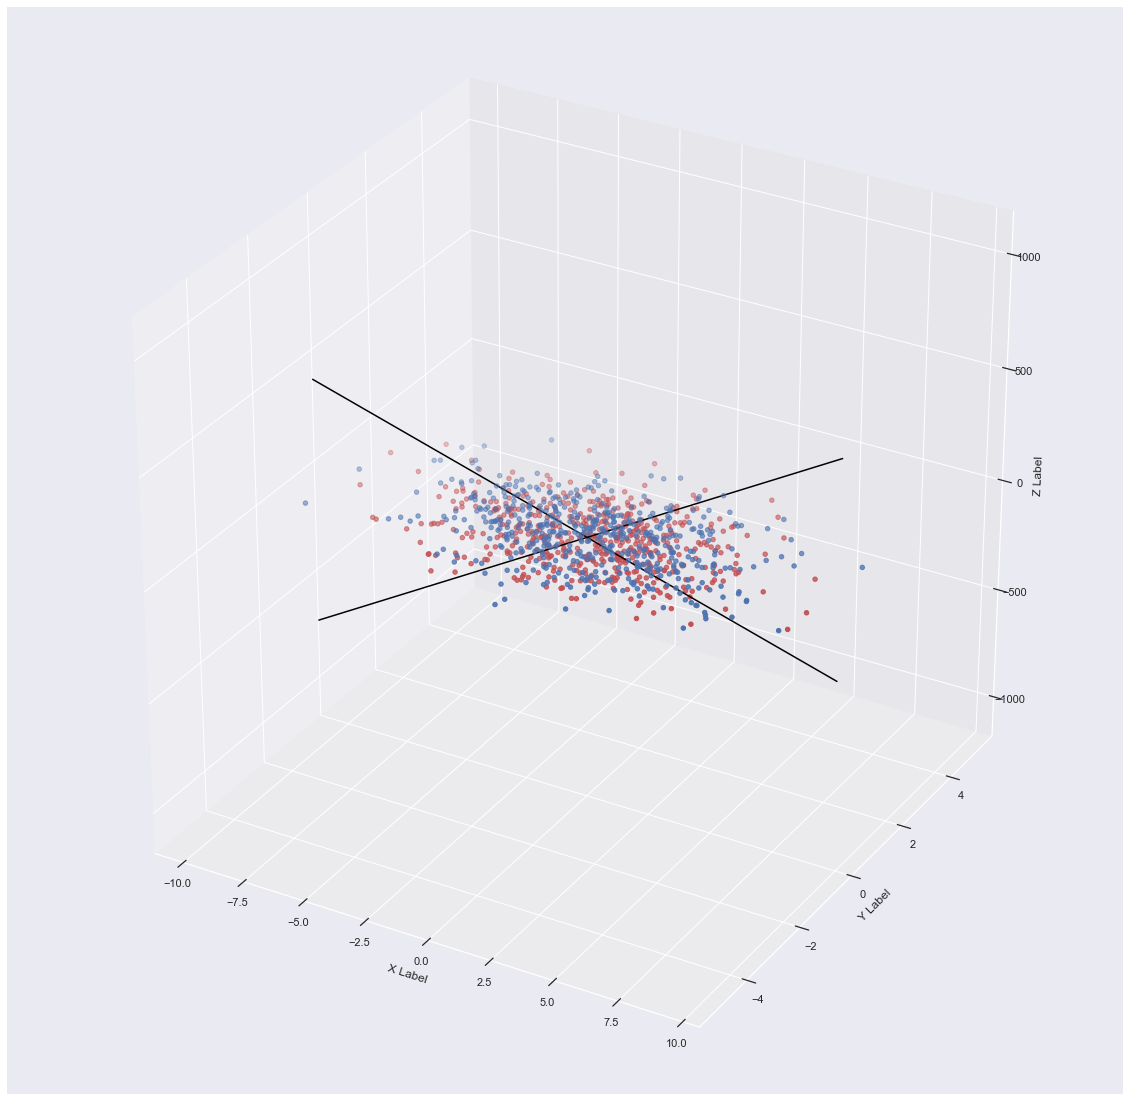

In [221]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')


x = np.linspace(-5,5,1000)
y = np.linspace(-5,5,1000)
z = (-w[0]/w[2])*x + (-w[1]/w[2])*y
z1 = (w[2]/w[0])*x + (w[2]/w[1])*y


ax.scatter(positive_class[0],positive_class[1],positive_class[2],color='r')
ax.scatter(negative_class[0],negative_class[1],negative_class[2],color='b')
ax.plot(x,y,z,color='black')
ax.plot(x,y,z1,color='black')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

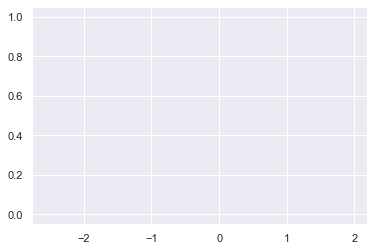

In [123]:
fig = plt.figure()
ax = plt.axes()

plt.plot(projected_positive_class,1,color='r')
ax.plot(projected_negative_class,0,color='b')
plt.show()

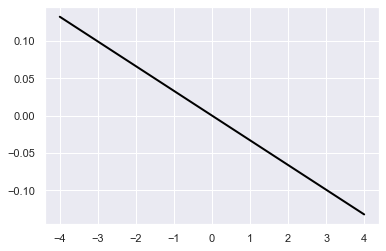

In [45]:
x1 = np.linspace (-4,4,1000)
x2 = (-w[0]/w[1])*x1
fig = plt.figure()
plt.plot(x1,x2,color='black',linewidth=2.0)